#### Project 1: Edge Detection Application

In [7]:
# Import libraries.
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime
import re


# Function to validate age.
def validate_age(dob_str):
    try:
        dob = datetime.strptime(dob_str, '%Y-%m-%d')
        age = datetime.now().year - dob.year
        return age >= 18
    except ValueError:
        return False


# Function to validate email.
def validate_email(email):
    # Regular expression for email validation
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email)


# Function for user sign up.
def sign_up():
    print("\n=== SIGN UP ===")
    while True:
        # Collect user's email and dob.
        email = input("\nEnter your email or 'quit' to return to the main menu: ")
        if email.lower() == 'quit':
            print("\nReturning to the authentication page...")
            break
        else:
            if validate_email(email):
                break
            else:
                print("\nInvalid email address. Please try again.")

    dob_str = input("Enter your date of birth (YYYY-MM-DD):")
    if validate_age(dob_str):
        # Save user's credentials to a file.
        with open("database/credentials/visitor_credentials.txt", "a") as file:
            file.write(f"{email},{dob_str}\n")

        print("\nSign up successful!")
        return True
    else:
        print("\nPeople below 18 years are not permitted to use this application.")
        print("\nReturning to the main menu...")
        return False


# Function for user login.
def sign_in():
    print("\n=== SIGN IN ===")
    # Load existing user credentials from file.
    database = []
    with open("database/credentials/visitor_credentials.txt", "r") as file:
        for line in file:
            email, _ = line.strip().split(",")
            database.append(email)

    while True:
        # Request email from the user.
        email = input("\nEnter your email or 'quit' to exit: ")
        if email.lower() == 'quit':
            print("\nExiting login process...")
            return False

        # Check if email is in database.
        if email in database:
            print("\nLogin successful!")
            return email
        else:
            print("\nEmail not recognised, please sign up.")




In [8]:
# Function to handle verify user inputs.
def choice_verification(choice, first, last, rand):
    if choice.isdigit() and (first <= int(choice) <= last):
        choice = int(choice)
        if choice == rand:
            choice = random.choice(list(range(first, rand)))
            return choice
        else:
            return choice
    else:
        print(f"Invalid choice. Please enter a number between {first} and {last}:")
        return None


# Function to check validity of user input
def isValid(input):
    if input.isdigit() and int(input) < 10000:
        return True
        


# Auth Page
def authentication_page():
    print("\n=== AUTHENTICATION PAGE ===")
    print("1. Sign up")
    print("2. Sign in")
    print("3. Quit")
    choice = input("Enter your choice: ")
    return choice


# Collection Page
def collection_page(choice):
    print("\n=== COLLECTIONS PAGE ===")
    print("1. Traditional Art")
    print("2. Modern Art")
    print("3. Contemporary Art")
    print("4. Randomly select")
    print("5. Log out")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 5, 4)
        if choice:
            return choice


# Traditional Art Page
def traditional():
    print("\n=== TRADITIONAL ART ===")
    print("1. Benin King Bust")
    print("2. Benin Queen Bust")
    print("3. Igbo-Ukwu Art")
    print("4. Female Nok Head")
    print("5. Male Nok Head")
    print("6. Randomly select")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 6, 6)
        if choice:
            return choice


# Contemporary Art Page
def contemporary():
    print("\n=== MODERN ART ===")
    print("1. Durbar: David Dale [1999]")
    print("2. In the Country: David Dale[1997]")
    print("3. Fulani Dancers Part: Lara Ige [1994]")
    print("4. The Evening for Milkmaids: Lara Ige [1991]")
    print("5. Home Bond: Hamid Ibrahim [1995]")
    print("6. Randomly select")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 6, 6)
        if choice:
            return choice


# Modern Art Page
def modern():
    print("\n=== MODERN ART ===")
    print("1. Fulani Herdsmen: Victor Epuk [1997]")
    print("2. Tales By Moonlight: Victor Epuk [1997]")
    print("3. Panel of 5: Bruce Onobrakpeya [1987]")
    print("4. Landscape from the North: Kolade Oshinowo [2003]")
    print("5. Red Sky: David Dale [1975]")
    print("6. Randomly select")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 6, 6)
        if choice:
            return choice


# Main Menu
def operator_page():
    print("\n=== TRANSFORMATION PAGE ===")
    print("\nWhich edge detection operator would you like to use on your image?")
    print("1. Sobel")
    print("2. Prewitt")
    print("3. Robert")
    print("4. Laplacian")
    print("5. Canny")
    print("6. View Image")
    print("7. Change image [ Menu ]")
    choice = input("Enter your choice: ")
    return choice


# Function for image blurring.
def blur(image):
    print('\n=== IMAGE BLURRING ===')

    new_image = None

    while True:
        print("\nWhat type of blurring would you like to carry out on your image?")
        print("1. Gaussian Blur")
        print("2. Median Blur")
        print("3. Bilateral Blur")
        print("4. Main Menu")
        choice = input("Enter your choice: ")
        
        if choice.isdigit() and (1 <= int(choice) <= 4):
            choice = int(choice)
            if choice == 1:
                print('\n=== GAUSSIAN BLUR ===')
        
                # Plot the original image.
                display(1, "Original", image)
                
                gaussian_blurred_img = cv2.GaussianBlur(image, (7, 7), 0)

                # Plot the blurred image.
                display(2, "Gaussian Blur", gaussian_blurred_img)
                
                # window_display(gaussian_blurred_img, "gaussian_blurred_img")

                new_image = gaussian_blurred_img
                return new_image
            
            elif choice == 2:
                print('\n=== MEDIAN BLUR ===')
        
                # Plot the original image.
                display(1, "Original", image)
                
                median_blurred_img = cv2.medianBlur(image, 5)

                # Plot the blurred image.
                display(2, "Median Blur", median_blurred_img)
                
                # window_display(median_blurred_img, "median_blurred_img")
                
                new_image = median_blurred_img
                return new_image

            elif choice == 3:
                print('\n=== BILATERAL BLUR ===')

                # Plot the original image.
                display(1, "Original", image)
                
                bilateral_blurred_img = cv2.bilateralFilter(image, 9, 75, 75)

                # Plot the blurred image.
                display(2, "Bilateral Blur", bilateral_blurred_img)
                
                # window_display(bilateral_blurred_img, "bilateral_blurred_img")
                
                new_image = bilateral_blurred_img
                return new_image
            
            elif choice == 4:
                print('\nRedirecting to Main Menu...')
                return None      
        else:
            print(f"Invalid choice. Please enter a number between 1 and 4:")


# Function for displaying images (plotting).
def display(position, title, image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, position)
    plt.title(title)
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.imshow(image, cmap='viridis')
    plt.axis('off')
    # plt.imshow(image)
    plt.show()


# Function for Window Display.
def window_display(image, image_name):
    cv2.imshow('Image', image)
    cv2.imwrite(f"output/{image_name}.jpg", image)
    cv2.destroyAllWindows()


# Function for image translation.
def sobel(image):
    print('\n=== IMAGE TRANSLATION ===')
    rows, cols = image.shape

    # Plot the original image
    display(1, "Original", image)
    
    M = np.float32([[1, 0, 100], [0, 1, 50]])
    translated_image = cv2.warpAffine(image, M, (cols, rows))
    
    # Plot the translated image
    display(2, "Translated Image", translated_image)

    # window_display(translated_image, "translated_image")




    # Load the image
    image = cv2.imread('img/wole.jpg', cv2.IMREAD_GRAYSCALE)
    
    # Resize images
    image = cv2.resize(image, (400, 400))
    
    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine the gradient images
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    
    # Display the original image and the Sobel edges
    cv2.imshow("Original", image)
    cv2.imshow("Sobel Edges", np.uint8(sobel_combined))
    
    # Wait for a key press and close all windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

# Function for image reflection.
def prewitt(image):
    print('\n=== IMAGE REFLECTION ===')
    
    # Plot the original image
    display(1, "Original", image)
    
    rows, cols = image.shape
    M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
    reflected_image = cv2.warpPerspective(image, M, (int(cols), int(rows)))
    
    # Plot the translated image
    display(2, "Reflected Image", reflected_image)

    # window_display(reflected_image, "reflected_image")
    

# Function for image rotation.
def robert(image):
    print('\n=== IMAGE ROTATION ===')
    rows, cols = image.shape

    # Plot the original image.
    display(1, "Original", image)
    
    rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.6), (cols, rows))
    
    # Plot the rotated image.
    display(2, "Rotated Image", rotated_image)
    
    # window_display(rotated_image, "rotated_image")


# Function for image cropping.
def laplacian(image):
    print('\n=== IMAGE CROPPING ===')
    # Plot the original image.
    display(1, "Original", image)

    print("\nThis application has been modified to allow you specify coordinates for scaling (cropping) your image.")
    print("Don't be afraid to try different variations, input integers of i32 only.")
    
    while True:
        x1 = input("Input Xa (e.g 450): ")
        y1 = input("Input Ya (e.g 700): ")
        x2 = input("Input Xb (e.g 200): ")
        y2 = input("Input Yb (e.g 500): ")        
        
        # Check validity of user input
        if isValid(x1) and isValid(y1) and isValid(x2) and isValid(y2):
            x1 = int(x1)
            y1 = int(y1)
            x2 = int(x2)
            y2 = int(y2)
        else:
            print("Invalid input. Please enter integers less than 10000.")
            continue
        
        cropped_image = image[x1:y1, x2:y2]
        
        # Plot the cropped image.
        display(2, "Cropped Image", cropped_image)
        break
        
        # window_display(cropped_image, "cropped_image")



# Function for image shearing.
def canny(image):
    print('\n=== IMAGE SHEARING ===')

    while True:
        print("\nWhat axis would you like the image operator to occur?")
        print("1. X-AXIS")
        print("2. Y-AXIS")
        print("3. Main Menu")
        choice = input("Enter your choice: ")
        
        if choice.isdigit() and (1 <= int(choice) <= 3):
            choice = int(choice)
            if choice == 1:
                print('\n=== IMAGE SHEARING [ X-AXIS ] ===')
                rows, cols = image.shape
        
                # Plot the original image.
                display(1, "Original", image)
                
                M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
                sheared_image_x = cv2.warpPerspective(image, M, (int(cols*1.5), int(rows*1.5)))

                # Plot the sheared image.
                display(2, "Sheared Image (X-axis)", sheared_image_x)
                
                # window_display(sheared_image_x, "sheared_image_x")
            
            elif choice == 2:
                print('\n=== IMAGE SHEARING [ Y-AXIS ] ===')
                rows, cols = image.shape
        
                # Plot the original image.
                display(1, "Original", image)
                
                M = np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]])
                sheared_image_y = cv2.warpPerspective(image, M, (int(cols * 1.5), int(rows * 1.5)))

                # Plot the sheared image.
                display(2, "Sheared Image (Y-axis)", sheared_image_y)
                
                # window_display(sheared_image_y, "sheared_image_y")

            elif choice == 3:
                print('\nRedirecting to Main Menu...')
                break      
        else:
            print(f"Invalid choice. Please enter a number between 1 and 3:")


# Function for image viewer.
def view(image_path):
    print('\n=== IMAGE VIEWER ===')
    image = cv2.imread(image_path, 0)
    display(1, "ARTWORK", image)
    return True


# Function to perform image operator based on user's choice.
def edge_detect(image_path, operator_choice):
    operators = {
        "1": sobel,
        "2": prewitt,
        "3": robert,
        "4": laplacian,
        "5": canny,
        "6": view
    }

    # Check if operator_choice is valid
    print("Looking for bugs?")
    if operator_choice in operators:
        operators[operator_choice](image_path)
    else:
        print("Invalid operator choice.")



Welcome to the Edge Detection Application!

=== AUTHENTICATION PAGE ===
1. Sign up
2. Sign in
3. Quit


Enter your choice:  2



=== SIGN IN ===



Enter your email or 'quit' to exit:  a@a.com



Login successful!

=== COLLECTIONS PAGE ===
1. Traditional Art
2. Modern Art
3. Contemporary Art
4. Randomly select
5. Log out


Enter your choice:  1



=== TRADITIONAL ART ===
1. Benin King Bust
2. Benin Queen Bust
3. Igbo-Ukwu Art
4. Female Nok Head
5. Male Nok Head
6. Randomly select


Enter your choice:  1



=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  6


Checking if path [database/collections/traditional/1.jpg] exists...
Yay! It does!
Looking for bugs?

=== IMAGE VIEWER ===


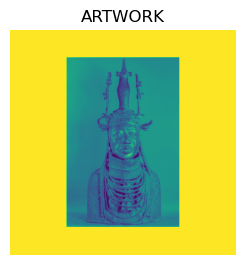


=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  7



Redirecting to Main Menu...




=== COLLECTIONS PAGE ===
1. Traditional Art
2. Modern Art
3. Contemporary Art
4. Randomly select
5. Log out


Enter your choice:  5



Logging you out...

=== AUTHENTICATION PAGE ===
1. Sign up
2. Sign in
3. Quit


Enter your choice:  3



Exiting the Edge Detection Application...


In [9]:
# Main function to execute the application
def main():
    print("Welcome to the Edge Detection Application!")
    
    while True:
        choice = authentication_page()
        if choice == "1":
            sign_up()
        elif choice == "2":
            email = sign_in()
            if email:
                while True:
                    # Select a collection
                    collection = ['traditional','modern','contemporary']
                    choice = int(collection_page(choice)) - 1
                    if choice < 3:
                        chosen = collection[choice]
                    else:
                        print("\nLogging you out...")
                        break

                    # Select an image from the chosen collection.
                    if choice == 0:
                        image = traditional()
                    elif choice == 1:
                        image = modern()
                    elif choice == 2:
                        image = contemporary()
                        

                    # Get the image path.
                    image_path = f"database/collections/{chosen}/{image}.jpg"

                    # Inner loop to carry out various edge operators on the same image.
                    while True:
                        # Get edge operator
                        operator_choice = operator_page()
                        
                        # Check if the input is a valid choice (a number between 1 and 7)
                        if operator_choice.isdigit() and 1 <= int(operator_choice) <= 7:
                            if operator_choice == "7":
                                print('\nRedirecting to Main Menu...\n')
                                break

                            else:
                                # Perform selected enhancement on the user's image
                                print(f"Checking if path [{image_path}] exists...")
                                if os.path.exists(image_path):
                                    print("Yay! It does!")
                                    edge_detect(image_path, operator_choice)
                                else:
                                    print("Image not found.")
                        else:
                            print("\nInvalid choice. Please enter a number between 1 and 7:")
        elif choice == "3":
            print("\nExiting the Edge Detection Application...")
            break
        else:
            print("\nInvalid choice. Please try again.")


# Execute the main function
if __name__ == "__main__":
    main()
    
